In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
from matplotlib import pyplot as plt
import os

# Read the data
df = pd.read_pickle("../data/token_scores.pkl")
df["gpt_any_refs"] = df["gpt_labels_refs_bool"].apply(lambda x: any(x))
df["gpt_any_refs"].value_counts()

# Clean the data
df.drop(df[df["gpt_any_refs"] == False].index, inplace=True)
df = df.reset_index()

In [3]:
# Add random scores
torch.manual_seed(42)
df["scores_random"] = df["gpt_labels_refs_bool"].apply(lambda x: torch.rand(len(x)))

In [4]:

df["has_gt_labels"] = df["gt_labels_refs_bool"].apply(lambda x: x is not None)
inds_with_gt_label = df[df["has_gt_labels"]].index.to_list()
inds_with_gt_label

# df.iloc[inds_with_gt_label[22]]
df.iloc[inds_with_gt_label[22]]

index                                                                 276
passage                 Commercial vehicle registration fees, vehicle ...
gpt_labels_refs_bool    [False, False, False, False, False, False, Fal...
passage_tokens          [Commercial, vehicle, registration, fees, ,, v...
diag_sep_passage        aactually, who's in charge of collecting the t...
gpt_refs                [{'ref_span': 'The DMV collects the taxes for ...
gt_labels_refs_bool     [False, False, False, False, False, False, Fal...
att_rollout             [tensor(0.0068), tensor(0.0018), tensor(0.0013...
grad_sam_scores         [tensor(1.0783e-07), tensor(1.0917e-07), tenso...
att_cat_scores          [tensor(-5.1040e-06), tensor(3.4367e-05), tens...
mean_att_all            [tensor(0.0005), tensor(0.0004), tensor(0.0005...
mean_att_last_layer     [tensor(0.0008), tensor(0.0005), tensor(0.0008...
gpt_labels_refs         [tensor(-1.), tensor(-1.), tensor(-1.), tensor...
gt_labels_refs          [tensor(-1.), 

## Token F1 scores GT vs GPT

In [16]:
from sklearn.metrics import f1_score, recall_score

def calc_f1_score(x, y):
    if x is None or y is None:
        return None
    return f1_score(x, y)



df["gt_gpt_f1"] = df.apply(lambda x: calc_f1_score(x["gt_labels_refs"], x["gpt_labels_refs"]), axis=1)

gt_gpt_f1 = df["gt_gpt_f1"].mean()
print(f"Mean F1 score: {gt_gpt_f1}")
df["gt_gpt_f1"].value_counts()

Mean F1 score: 0.43334480239292067


gt_gpt_f1
0.000000    25
1.000000     5
0.640000     2
0.962963     2
0.758621     2
0.500000     2
0.657895     1
0.329114     1
0.816327     1
0.625000     1
0.520000     1
0.560976     1
0.682927     1
0.067797     1
0.566038     1
0.333333     1
0.794521     1
0.700000     1
0.336842     1
0.977273     1
0.444444     1
0.175824     1
0.516129     1
0.727273     1
0.823529     1
0.145833     1
0.379747     1
0.755556     1
0.230769     1
0.229508     1
0.218182     1
0.560000     1
0.873239     1
0.744186     1
0.526316     1
0.912000     1
0.285714     1
0.857143     1
0.987013     1
0.923077     1
0.428571     1
0.800000     1
0.347826     1
0.976744     1
0.323529     1
0.684211     1
0.666667     1
Name: count, dtype: int64

In [15]:

def calc_recall_score(x, y):
    if x is None or y is None:
        return None
    x1 = x.clone()
    x1[x1 == -1] = 0
    y1 = y.clone()
    y1[y1 == -1] = 0
    return recall_score(x, y)

df["gt_gpt_recall"] = df.apply(lambda x: calc_recall_score(x["gt_labels_refs"], x["gpt_labels_refs"]), axis=1)

gt_gpt_recall = df["gt_gpt_recall"].mean()
print(f"Mean recall score: {gt_gpt_recall}")
df["gt_gpt_recall"].value_counts()

Mean recall score: 0.4792707275678272


/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/skl

gt_gpt_recall
0.000000    25
1.000000    14
0.954545     3
0.928571     2
0.470588     2
0.611111     2
0.571429     1
0.761905     1
0.700000     1
0.615385     1
0.933333     1
0.937500     1
0.464286     1
0.789474     1
0.805556     1
0.086957     1
0.518519     1
0.638889     1
0.296296     1
0.538462     1
0.565217     1
0.192982     1
0.283019     1
0.210526     1
0.736842     1
0.290323     1
0.974359     1
0.222222     1
0.838235     1
0.357143     1
0.592593     1
0.775000     1
0.875000     1
0.250000     1
0.179487     1
0.340909     1
0.636364     1
Name: count, dtype: int64

gt_gpt_f1
0.000000    25
1.000000     5
0.640000     2
0.962963     2
0.758621     2
0.500000     2
0.657895     1
0.329114     1
0.816327     1
0.625000     1
0.520000     1
0.560976     1
0.682927     1
0.067797     1
0.566038     1
0.333333     1
0.794521     1
0.700000     1
0.336842     1
0.977273     1
0.444444     1
0.175824     1
0.516129     1
0.727273     1
0.823529     1
0.145833     1
0.379747     1
0.755556     1
0.230769     1
0.229508     1
0.218182     1
0.560000     1
0.873239     1
0.744186     1
0.526316     1
0.912000     1
0.285714     1
0.857143     1
0.987013     1
0.923077     1
0.428571     1
0.800000     1
0.347826     1
0.976744     1
0.323529     1
0.684211     1
0.666667     1
Name: count, dtype: int64

In [7]:
from custom_data_utils import utils
from IPython.display import display, HTML

def show_highlighted_passage(record, gt_bools_label, scores_label):
    highlighted_passage = utils.create_highlighted_passage(record["passage_tokens"],
                                                        gt_bools_label,
                                                        scores_label,
                                                        'green',
                                                        'linear')
    display(HTML("\n".join(highlighted_passage)))

record_min_f1 = df[df["gt_gpt_f1"] == 0].index[0]
record_max_f1 = df[df["gt_gpt_f1"] == df["gt_gpt_f1"].max()].index[0]

record_min = df.iloc[record_min_f1]
record_max = df.iloc[record_max_f1]

show_highlighted_passage(record_min, record_min["gt_labels_refs_bool"], record_min["gpt_labels_refs_bool"])
show_highlighted_passage(record_max, record_max["gt_labels_refs_bool"], record_max["gpt_labels_refs_bool"])


/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


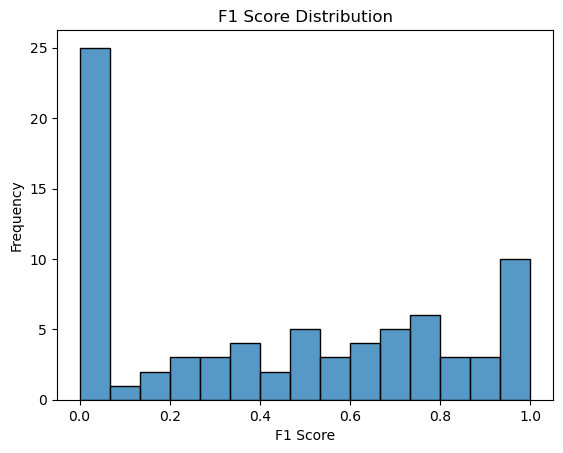

/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


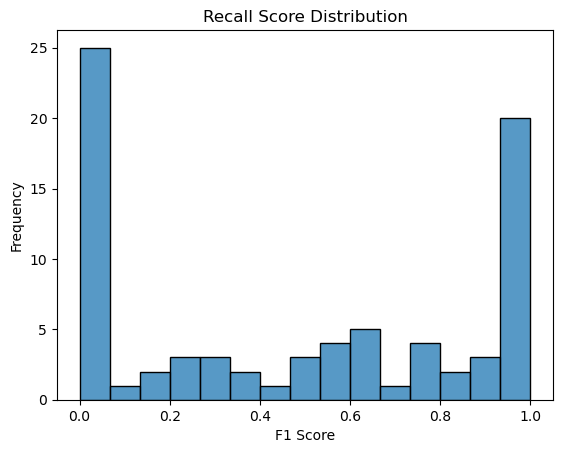

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scores(df, col, title):
    sns.histplot(data=df, x=col, bins=15)
    plt.xlabel("F1 Score")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

plot_scores(df, "gt_gpt_f1", "F1 Score Distribution")
plot_scores(df, "gt_gpt_recall", "Recall Score Distribution")

## Token F1 scores GPT vs scoring

In [9]:
from tqdm import tqdm

def get_top_k_indexes(scores: torch.Tensor, top_k=5):
    top_k_scores, top_k_indexes = torch.topk(scores.flatten(), top_k)
    conv_ids = torch.stack(torch.unravel_index(top_k_indexes, scores.shape)).T
    # Ensure only top_k, because torch.topk returns more than k, when duplicated values
    return conv_ids[:top_k]


def threshold_top_k(scores, top_k):
    top_k = top_k if top_k < len(scores) else len(scores) 
    top_k_indexes = get_top_k_indexes(  scores, top_k)
    thresholded_scores = torch.ones_like(scores) * -1  # Negative label in data is -1
    thresholded_scores[top_k_indexes] = 1
    return thresholded_scores


score_labels = [
    'att_rollout',
    'grad_sam_scores',
    'att_cat_scores',
    'mean_att_all',
    'mean_att_last_layer',
    'scores_random'
]
top_k_tokens_range = range(5, 250)

def calc_thresholding_f1(gt_label, save_filename):
    f1_scores = []
    for score_label in score_labels:
        for top_k_tokens in tqdm(top_k_tokens_range):
            df["running_threshold"] = df[score_label].apply(lambda x: threshold_top_k(x, top_k_tokens))
            running_f1 = df.apply(lambda x: calc_f1_score(x["running_threshold"], x[gt_label]), axis=1)
            f1_scores.append({
                "score_label": score_label,
                "k_tokens": top_k_tokens,
                "f1-value": running_f1.mean()
            })

            # Sanity check
            if top_k_tokens in [30, 100]:
                # Print aggregated f1 scores
                print(f"Label: {score_label} with top-{top_k_tokens} tokens has f1 mean: {running_f1.mean():0.4f}")
                
                # Print f1 for random sample
                rnd_record_id = inds_with_gt_label[22]
                record = df.iloc[rnd_record_id]
                print(f"rnd-record({rnd_record_id}) f1: {running_f1.iloc[rnd_record_id]:0.4f}")

                # Show threshold annotation
                gt_label_bool = gt_label + "_bool"
                record["running_threshold"][record["running_threshold"] == -1] = 0  # -1 to calc f1, 0 for vizualizations
                show_highlighted_passage(record, record[gt_label_bool], record["running_threshold"])

    torch.save(f1_scores, save_filename)



In [10]:
def show_thresholding_f1_scores(f1_scores):
    f1_data = pd.DataFrame(f1_scores)
    
    # Create a Seaborn plot
    plt.figure(figsize=(14, 10))  # Optional: Change figure size if needed
    sns.lineplot(x='k_tokens', y='f1-value', hue='score_label', data=f1_data)
    sns.lineplot(x=f1_data['k_tokens'], y=gt_gpt_f1, linestyle='--', label='gt_gpt_f1')
    # Add labels and title
    plt.ylabel('token-F1 score')
    plt.xlabel('Top K Tokens')
    plt.title('token-F1 Score vs Top K Tokens')

    # Show the plot
    plt.show()

In [11]:
def calcl_show_f1(f1_gt_loc, gt_label, recalc=True):
    if recalc or not os.path.exists(f1_gt_loc):
        calc_thresholding_f1(gt_label, f1_gt_loc)
    f1_scores_gt = torch.load(f1_gt_loc)
    show_thresholding_f1_scores(f1_scores_gt)

 10%|█         | 25/245 [00:03<00:33,  6.57it/s]

Label: att_rollout with top-30 tokens has f1 mean: 0.2308
rnd-record(271) f1: 0.2759


 39%|███▉      | 95/245 [00:14<00:21,  6.86it/s]

Label: att_rollout with top-100 tokens has f1 mean: 0.3204
rnd-record(271) f1: 0.4331


 10%|█         | 25/245 [00:03<00:31,  7.02it/s]

Label: grad_sam_scores with top-30 tokens has f1 mean: 0.2022
rnd-record(271) f1: 0.2989


 39%|███▉      | 95/245 [00:13<00:20,  7.20it/s]

Label: grad_sam_scores with top-100 tokens has f1 mean: 0.3447
rnd-record(271) f1: 0.6369


 10%|█         | 25/245 [00:03<00:35,  6.27it/s]

Label: att_cat_scores with top-30 tokens has f1 mean: 0.2639
rnd-record(271) f1: 0.2299


 39%|███▉      | 95/245 [00:14<00:21,  7.14it/s]

Label: att_cat_scores with top-100 tokens has f1 mean: 0.3226
rnd-record(271) f1: 0.3312


 10%|█         | 25/245 [00:03<00:35,  6.25it/s]

Label: mean_att_all with top-30 tokens has f1 mean: 0.2019
rnd-record(271) f1: 0.2989


 39%|███▉      | 95/245 [00:15<00:23,  6.33it/s]

Label: mean_att_all with top-100 tokens has f1 mean: 0.3207
rnd-record(271) f1: 0.5732


 10%|█         | 25/245 [00:03<00:33,  6.58it/s]

Label: mean_att_last_layer with top-30 tokens has f1 mean: 0.2037
rnd-record(271) f1: 0.5057


 39%|███▉      | 95/245 [00:14<00:24,  6.06it/s]

Label: mean_att_last_layer with top-100 tokens has f1 mean: 0.3273
rnd-record(271) f1: 0.7261


 10%|█         | 25/245 [00:03<00:31,  6.89it/s]

Label: scores_random with top-30 tokens has f1 mean: 0.2281
rnd-record(271) f1: 0.2989


 39%|███▉      | 95/245 [00:14<00:23,  6.44it/s]

Label: scores_random with top-100 tokens has f1 mean: 0.3204
rnd-record(271) f1: 0.4331


100%|██████████| 245/245 [00:37<00:00,  6.48it/s]
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldc

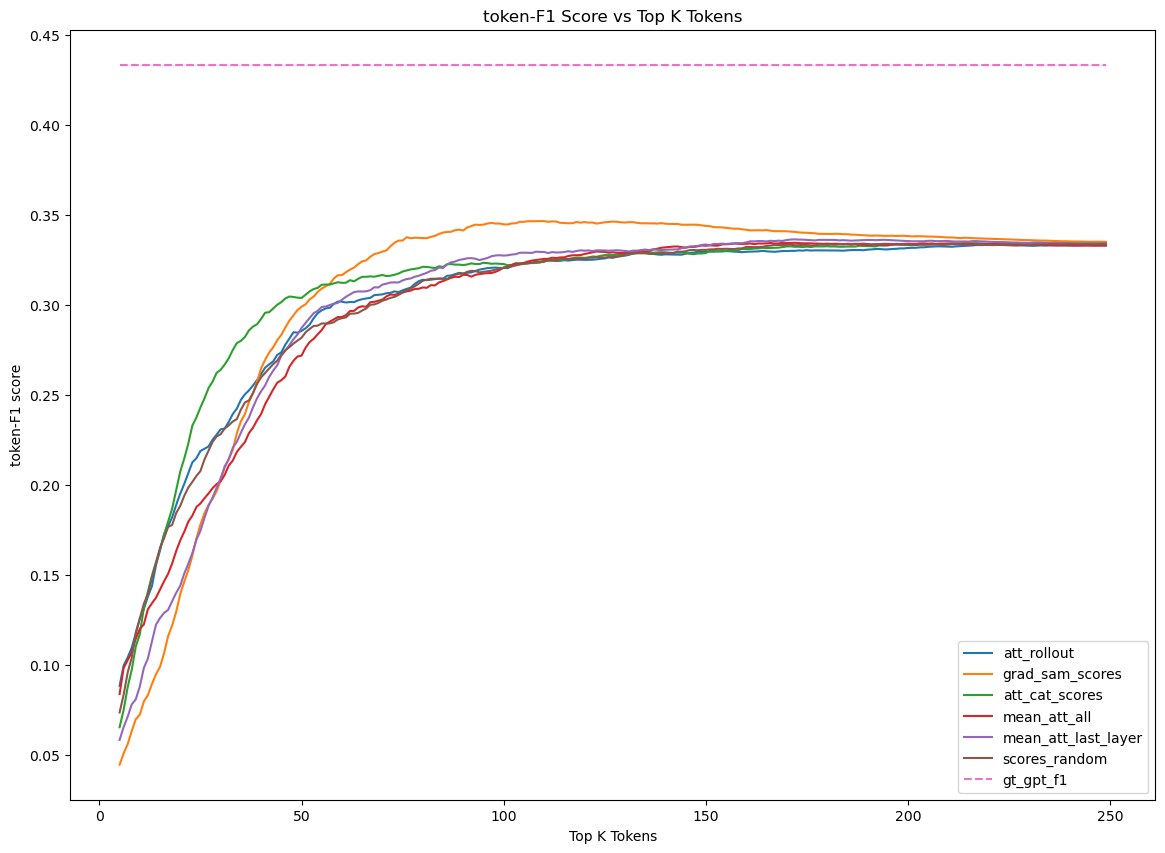

In [12]:
calcl_show_f1("../data/f1_scors_gt.pt", "gt_labels_refs")
# Run time: cca 6min
# Less data -> more noisy  

 10%|█         | 25/245 [00:24<03:19,  1.10it/s]

Label: att_rollout with top-30 tokens has f1 mean: 0.2247
rnd-record(271) f1: 0.1905


 39%|███▉      | 95/245 [01:24<02:07,  1.18it/s]

Label: att_rollout with top-100 tokens has f1 mean: 0.3228
rnd-record(271) f1: 0.2143


 10%|█         | 25/245 [00:22<03:11,  1.15it/s]

Label: grad_sam_scores with top-30 tokens has f1 mean: 0.2345
rnd-record(271) f1: 0.2857


 39%|███▉      | 95/245 [01:23<01:57,  1.28it/s]

Label: grad_sam_scores with top-100 tokens has f1 mean: 0.3375
rnd-record(271) f1: 0.1964


 10%|█         | 25/245 [00:19<02:50,  1.29it/s]

Label: att_cat_scores with top-30 tokens has f1 mean: 0.2572
rnd-record(271) f1: 0.0952


 39%|███▉      | 95/245 [01:14<01:57,  1.27it/s]

Label: att_cat_scores with top-100 tokens has f1 mean: 0.3272
rnd-record(271) f1: 0.0893


 10%|█         | 25/245 [00:19<02:51,  1.28it/s]

Label: mean_att_all with top-30 tokens has f1 mean: 0.2081
rnd-record(271) f1: 0.0952


 39%|███▉      | 95/245 [01:17<02:01,  1.24it/s]

Label: mean_att_all with top-100 tokens has f1 mean: 0.3223
rnd-record(271) f1: 0.1607


 10%|█         | 25/245 [00:20<03:04,  1.19it/s]

Label: mean_att_last_layer with top-30 tokens has f1 mean: 0.2209
rnd-record(271) f1: 0.0000


 39%|███▉      | 95/245 [01:15<01:56,  1.29it/s]

Label: mean_att_last_layer with top-100 tokens has f1 mean: 0.3299
rnd-record(271) f1: 0.2143


 10%|█         | 25/245 [00:19<02:55,  1.26it/s]

Label: scores_random with top-30 tokens has f1 mean: 0.2409
rnd-record(271) f1: 0.0476


 39%|███▉      | 95/245 [01:16<02:02,  1.23it/s]

Label: scores_random with top-100 tokens has f1 mean: 0.3241
rnd-record(271) f1: 0.1429


100%|██████████| 245/245 [03:33<00:00,  1.15it/s]
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldc

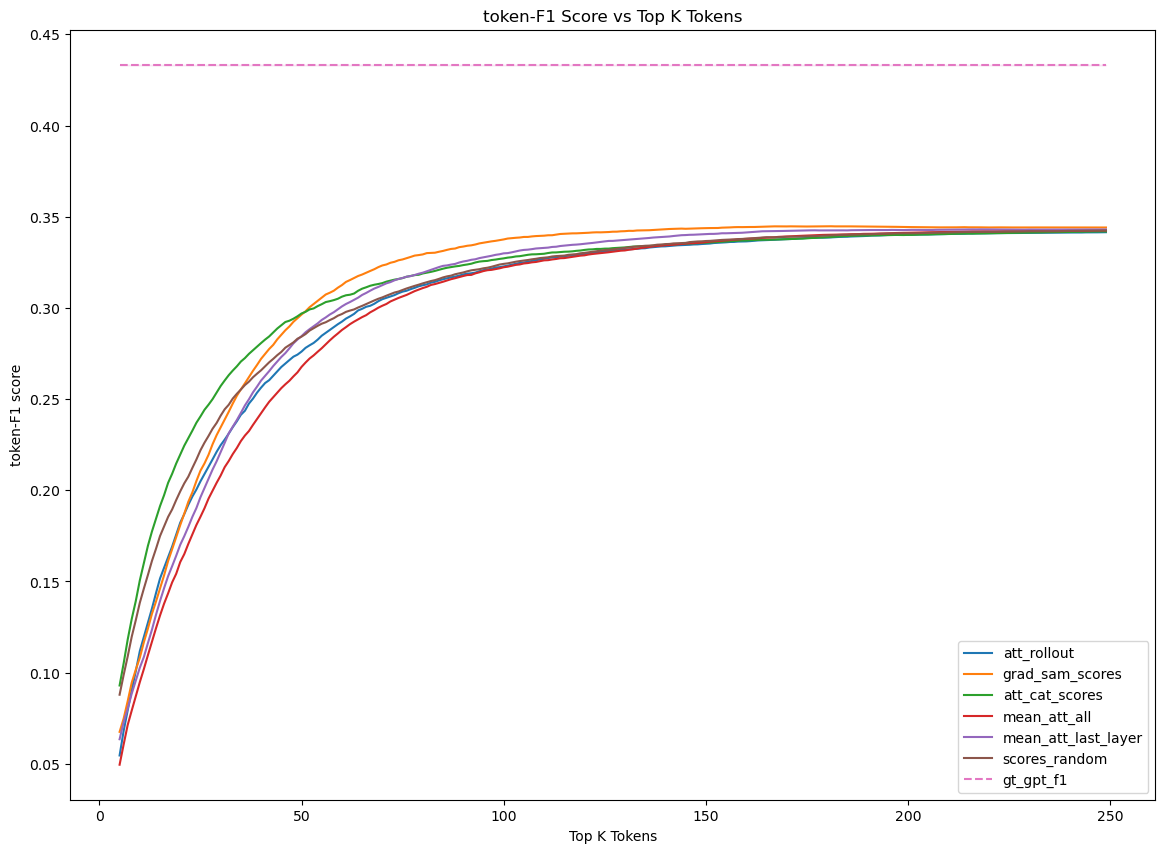

In [13]:


calcl_show_f1("../data/f1_scors_gpt.pt", "gpt_labels_refs")
# Run time: cca 36 min